In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns", 200)

In [2]:
dados_enem_2021 = pd.read_csv("MICRODADOS_ENEM_2021.csv", delimiter = ';', encoding = 'ISO-8859-1')

In [6]:
dados_enem_2021.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [4]:
dados_enem_2021.shape

(3389832, 76)

In [7]:
dados_enem_2021.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

### Preprocessando os dados

In [8]:
# Removendo colunas que não serão usadas na análise
colunas_remove = ['NU_ANO', 'TP_NACIONALIDADE', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 
                  'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 
                  'TX_GABARITO_MT']
# 'Q003', 'Q004', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013','Q014', 
#                   'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023'

In [9]:
df = dados_enem_2021.drop(columns = colunas_remove)

In [10]:
df.shape

(3389832, 62)

In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 62 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_ST_CONCLUSAO         int64  
 6   TP_ANO_CONCLUIU         int64  
 7   TP_ESCOLA               int64  
 8   TP_ENSINO               float64
 9   IN_TREINEIRO            int64  
 10  CO_MUNICIPIO_ESC        float64
 11  NO_MUNICIPIO_ESC        object 
 12  CO_UF_ESC               float64
 13  SG_UF_ESC               object 
 14  TP_DEPENDENCIA_ADM_ESC  float64
 15  TP_LOCALIZACAO_ESC      float64
 16  TP_SIT_FUNC_ESC         float64
 17  CO_MUNICIPIO_PROVA      int64  
 18  NO_MUNICIPIO_PROVA      object 
 19  CO_UF_PROVA             int64  
 20  SG_UF_PROVA             object 
 21  TP_PRESENCA_CN          int64  

In [14]:
# Definindo uma função que dá o porcentagem dos valores NaN na df
def porcentagem_de_nan_values():
    n = df.NU_INSCRICAO.count()
    na = df.isna().sum()
    na_percentagem = (na/n)*100
    return na_percentagem[na>0]

In [15]:
porcentagem_de_nan_values()

TP_ENSINO                 67.643588
CO_MUNICIPIO_ESC          75.992734
NO_MUNICIPIO_ESC          75.992734
CO_UF_ESC                 75.992734
SG_UF_ESC                 75.992734
TP_DEPENDENCIA_ADM_ESC    75.992734
TP_LOCALIZACAO_ESC        75.992734
TP_SIT_FUNC_ESC           75.992734
NU_NOTA_CN                33.747631
NU_NOTA_CH                29.837850
NU_NOTA_LC                29.837850
NU_NOTA_MT                33.747631
TP_STATUS_REDACAO         29.837850
NU_NOTA_COMP1             29.837850
NU_NOTA_COMP2             29.837850
NU_NOTA_COMP3             29.837850
NU_NOTA_COMP4             29.837850
NU_NOTA_COMP5             29.837850
NU_NOTA_REDACAO           29.837850
Q001                       0.000059
Q002                       0.000059
Q003                       0.000059
Q004                       0.000059
Q005                       0.000059
Q006                       0.000059
Q007                       0.000059
Q008                       0.000059
Q009                       0

In [16]:
# Vamos excluir os dados faltosos com taxa de 0%, haja vista que são estatísticamente insignificantes
quest_socio_econo = ['Q001','Q002','Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                    'Q014','Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022','Q023','Q024','Q025']
df.dropna(subset = quest_socio_econo, inplace = True)

In [17]:
porcentagem_de_nan_values()

TP_ENSINO                 67.643569
CO_MUNICIPIO_ESC          75.992719
NO_MUNICIPIO_ESC          75.992719
CO_UF_ESC                 75.992719
SG_UF_ESC                 75.992719
TP_DEPENDENCIA_ADM_ESC    75.992719
TP_LOCALIZACAO_ESC        75.992719
TP_SIT_FUNC_ESC           75.992719
NU_NOTA_CN                33.747622
NU_NOTA_CH                29.837838
NU_NOTA_LC                29.837838
NU_NOTA_MT                33.747622
TP_STATUS_REDACAO         29.837838
NU_NOTA_COMP1             29.837838
NU_NOTA_COMP2             29.837838
NU_NOTA_COMP3             29.837838
NU_NOTA_COMP4             29.837838
NU_NOTA_COMP5             29.837838
NU_NOTA_REDACAO           29.837838
dtype: float64

In [18]:
# Para os dados ausentes das localizações dos parcipantes
local_columns = ['CO_MUNICIPIO_ESC','CO_MUNICIPIO_PROVA','CO_UF_PROVA', 'CO_UF_ESC', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA',
                'SG_UF_PROVA','SG_UF_ESC']
df[local_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389830 entries, 0 to 3389830
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CO_MUNICIPIO_ESC    float64
 1   CO_MUNICIPIO_PROVA  int64  
 2   CO_UF_PROVA         int64  
 3   CO_UF_ESC           float64
 4   NO_MUNICIPIO_ESC    object 
 5   NO_MUNICIPIO_PROVA  object 
 6   SG_UF_PROVA         object 
 7   SG_UF_ESC           object 
dtypes: float64(2), int64(2), object(4)
memory usage: 232.8+ MB


In [ ]:
# Precisamos transformar os dados tipo object em numericos para encontrar a matriz de correlação
# df_corr = df[local_columns].copy()
# for i in df_corr[local_columns].columns:
#     if df_corr[i].dtype == 'object':
#         df_corr[i] = LabelEncoder().fit_transform(df_corr[i])

In [19]:
# Alguns dados de localização são categoricos e outros são numericos, então, usaremos matriz de correlação para ver como essas 
# variáveis estão relacionadas
df_local = df[local_columns].copy()
corr_local_matriz = df_local.corr()

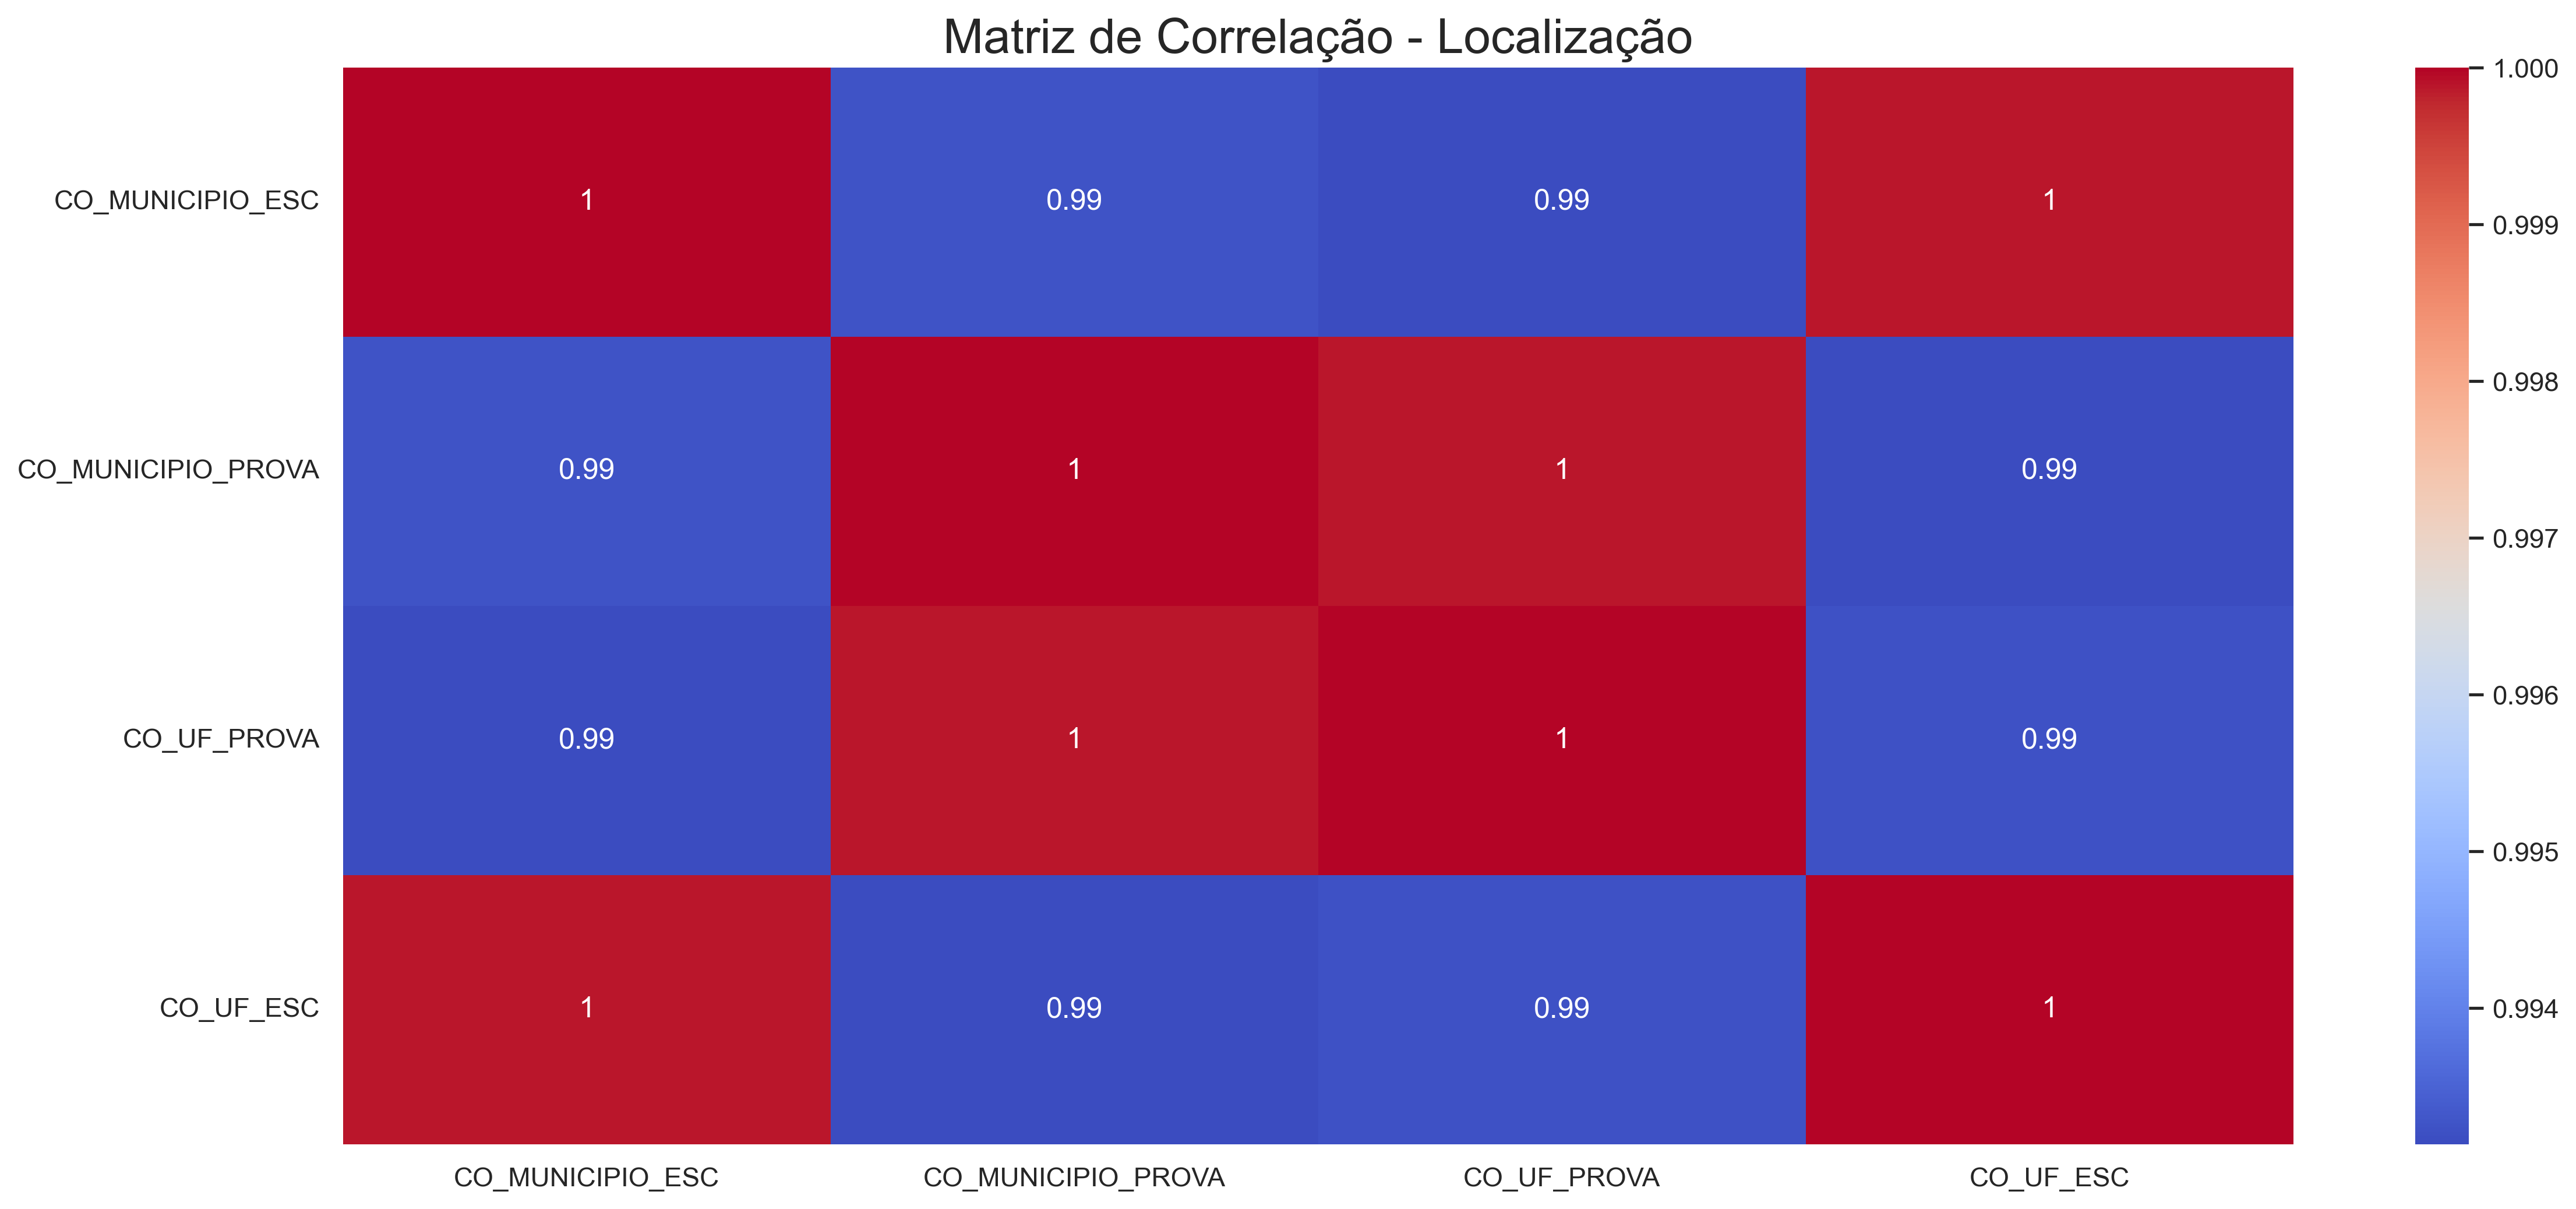

In [27]:
plt.figure(figsize = (18,8), dpi=300)
sns.heatmap(corr_local_matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Localização', fontsize = 20)
plt.show()

In [28]:
# Há uma forte correlação entres os dados numericos acerca da localização dos participantes. Desta forma para excluir os dados
# ausentes, usaremos as colunas 'CO_UF_PROVA' e 'SG_PROVA' porque estão completas.
df_local.isnull().sum()

CO_MUNICIPIO_ESC      2576024
CO_MUNICIPIO_PROVA          0
CO_UF_PROVA                 0
CO_UF_ESC             2576024
NO_MUNICIPIO_ESC      2576024
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
SG_UF_ESC             2576024
dtype: int64

In [29]:
df.drop(columns = ['CO_MUNICIPIO_ESC','CO_MUNICIPIO_PROVA', 'CO_UF_ESC', 'NO_MUNICIPIO_ESC', 'NO_MUNICIPIO_PROVA','SG_UF_ESC'],
       inplace = True)

In [30]:
porcentagem_de_nan_values()

TP_ENSINO                 67.643569
TP_DEPENDENCIA_ADM_ESC    75.992719
TP_LOCALIZACAO_ESC        75.992719
TP_SIT_FUNC_ESC           75.992719
NU_NOTA_CN                33.747622
NU_NOTA_CH                29.837838
NU_NOTA_LC                29.837838
NU_NOTA_MT                33.747622
TP_STATUS_REDACAO         29.837838
NU_NOTA_COMP1             29.837838
NU_NOTA_COMP2             29.837838
NU_NOTA_COMP3             29.837838
NU_NOTA_COMP4             29.837838
NU_NOTA_COMP5             29.837838
NU_NOTA_REDACAO           29.837838
dtype: float64

In [31]:
# Como as porcentagem de dados ausentes são altas paras as colunas 'TP...' então exluiremos estas colunas, exceto a 
#'TP_STATUS_REDACAO'
df.drop(columns = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'], inplace = True)

In [34]:
porcentagem_de_nan_values()

NU_NOTA_CN           33.747622
NU_NOTA_CH           29.837838
NU_NOTA_LC           29.837838
NU_NOTA_MT           33.747622
TP_STATUS_REDACAO    29.837838
NU_NOTA_COMP1        29.837838
NU_NOTA_COMP2        29.837838
NU_NOTA_COMP3        29.837838
NU_NOTA_COMP4        29.837838
NU_NOTA_COMP5        29.837838
NU_NOTA_REDACAO      29.837838
dtype: float64

In [35]:
# Aqui terminamos a preprocessamento dos dados. Estes os outras valores NaN serão tratos de forma diferente dependo das análises
# futuras. Exemplo: os ausentes em 'TP_STATUS_REDACAO' zeram as notas da redação, no entanto, 

In [36]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,5,F,1,1,1,3,1,0,31,MG,0,1,1,0,NaN,574.6,472.6,NaN,1,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,12,M,1,1,1,11,1,0,27,AL,1,1,1,1,505.9,551.8,498.3,461.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,13,F,3,1,1,15,1,0,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,3,M,1,3,2,0,2,0,23,CE,1,1,1,1,580.7,678.9,638.9,659.5,0,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2,F,1,3,2,0,2,0,23,CE,1,1,1,1,497.7,532.4,457.6,582.6,1,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
